# Principal Component Analysis


PCA is an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.
PCA analysis is perfromed either using EVD of the covariance matrix or the SVD of the mean-centered data.


## Prerequisites

The reader should be familiar with linear algebra and statistics concepts.

## Competences 

The reader should be able to perform PCA on a given data set.

## References

For more details see

* [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis),
* [L. I. Smith, A tutorial on Principal Components Analysis](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf),
* [J. Shlens, A Tutorial on Principal Components Analysis][Shl14].

[Shl14]: http://arxiv.org/abs/1404.1100 "Jonathon Shlens, 'A Tutorial on Principal Component Analysis', arXiv:1404.1100, 2014."

## Definitions

A __data matrix__ is a matrix $X\in\mathbb{R}^{m\times n}$, where each column corresponds to a feature (say, certain gene), and each row correspond to an observation (say, individual).

A __mean__ of a vector $x\in\mathbb{R}^{n}$ is $\mu(x)=\displaystyle \frac{x_1+x_2+\cdots x_n}{n}$.

A __standard deviation__  of a vector $x$ is $\sigma(x)=\displaystyle \sqrt{\frac{\sum_{i=1}^n (x_i-\mu(x))^2}{n-1}}$.
A __variance__ of a vector $x$ is $\mathop{\mathrm{var}}(x)=\sigma^2(x)$.

A __vector of means__ of a data matrix $X$ is a row-vector of means of the columns of $X$,
$\mu(X)=\begin{bmatrix}\mu(X_{:,1}) & \mu(X_{:,2}) & \ldots & \mu(X_{:,n})\end{bmatrix}$. 

A __zero-mean centered data matrix__ is a matrix $\bar X$ obtained from a data matrix $X$ by subtracting from each column the mean of this column,
$$
\bar X= \begin{bmatrix} X_{:,1}-\mu(X_{:,1}) & X_{:,2}-\mu(X_{:,2}) & \cdots & 
X_{:,n}-\mu(X_{:,n}) \end{bmatrix}\equiv
X-\mathbf{1}\mu(X),
$$
where $\mathbf{1}=[1,1,\ldots,1]^T$.

A __covariance matrix__ of a data matrix $X$ is a matrix
$$
\mathop{\mathrm{cov}}(X)=\displaystyle \frac{1}{n-1}[X-\mathbf{1}\mu(X)]^T[X-\mathbf{1}\mu(X)]
\equiv \frac{\bar X^T \bar X}{n-1}.
$$

## Facts

Given a data matrix $X$, let $\mathop{\mathrm{cov}}(X)=U\Lambda U^T$ be the EVD with non-increasingly ordered eigenvalues, $\lambda_1\geq \lambda_2\geq \cdots \geq \lambda_n$. 

1. $\mathop{\mathrm{cov}}(X)$  is a symmetric PSD matrix.

2. $\mathop{\mathrm{cov}}(X)=\mathop{\mathrm{cov}}(\bar X)$.

3. Let $T=\bar X U$. The columns of $T$ are the __principal components__ of $\bar X$. In particular:
    1. The first principal component of $\bar X$ (or $X$) is the first column, $T_{:,1}$. It is a projection of the zero-mean centered data set $\bar X$ on the line defined by $U_{:,1}$. This is the direction along which the data have the largest variance.  
    2. The second column (the second principal component), $T_{:,1}$, is 
a projection of $\bar X$ on the line defined by $U_{:,2}$, which is orthogonal to the first projection. This is direction with the largest variance _after_ subtracting the first principal component from $\bar X$. 
    3. The $k$-th principal component is the direction with the largest variance _after_ subtracting the first $k-1$ principal components from $\bar X$, that is, the first principal component of the matrix
$$
\hat X=\bar X-\sum_{i=1}^{k-1} \bar X U_{:,i} U_{:,i}^T.
$$

4. Let $\bar X=\bar U \Sigma V^T$ be the SVD of $\bar X$. Then $V=U$ and $T=\bar U\Sigma V^T V\equiv \bar U \Sigma$.

5. Reconstruction of the principal components is the following:
    1. Full reconstruction is $X=T U^T +\mathbf{1} \mu(X)$.
    2. Reconstruction from the first $k$ principal components is
    $\tilde X =T U_{:,1:k}^T +\mathbf{1} \mu(X)$.
    
6. Partial reconstructions can help obtaining various insights about the data. For example, the rows of the matrix $T_{:,1:k}$ can be clustered by the $k$-means algorithm, and the points defined by first three columns of $T$ can be
plotted to visualize projections of clusters. Afterwards, the computed clusters can be mapped back to original data.

7. Heuristical guess for number of important clusters is given be the location of the "knee" in the plot of the singular values of $\bar X$.

### Example - Elliptical data set

We generate a "quasi" elliptical set of points and compute its principal components. 

In [1]:
# Generate data points
using Random
Random.seed!(456)
n=3
m=500
ax=[8,3,1]
X=Array{Float64}(undef,m,n)
for i=1:n
    X[:,i]=rand!(X[:,i])*ax[i]
end
# Parameters
u=(rand(m).-0.5)*π
v=(rand(m).-0.5)*2*π
for i=1:m
    X[i,1]=X[i,1]*cos(u[i])*cos(v[i])
    X[i,2]=X[i,2]*cos(u[i])*sin(v[i])
    X[i,3]=X[i,3]*sin(u[i])
end

In [2]:
X₀=copy(X)

500×3 Array{Float64,2}:
  0.210576    -0.127732    0.776479
  0.591569    -0.876754    0.262941
  3.71806     -0.0563136  -0.024527
 -3.22498     -0.652015   -0.0999344
 -0.00225668   0.184277   -0.343653
  0.592944     2.66002     0.0073981
 -0.0503422   -0.0952142  -0.00904418
  0.370151    -0.153789   -0.264933
 -3.27693      0.339955    0.404337
 -2.30723      0.751473    0.399126
  2.48328     -0.579145   -0.10629
  0.460629    -0.0970859   0.354729
  3.38002      0.760876   -0.111974
  ⋮                       
 -5.24438     -0.121456    0.0163747
 -3.93267      0.63387    -0.0962625
 -1.26243      0.0279709   0.248269
 -0.0406195   -0.558751   -0.230258
  2.57882      0.0022758   0.141931
  4.36542      0.94466    -0.420983
 -0.55316      0.142784    0.00606709
 -2.59395      1.04655    -0.724932
  0.157457    -0.60424     0.664749
 -4.03607     -0.702379   -0.127965
 -0.682568     1.11439    -0.181113
 -1.60667     -1.75284     0.000999079

In [3]:
using LinearAlgebra
sum(abs.(X₀),dims=1)

1×3 Array{Float64,2}:
 847.573  303.555  153.47

In [4]:
using PyPlot

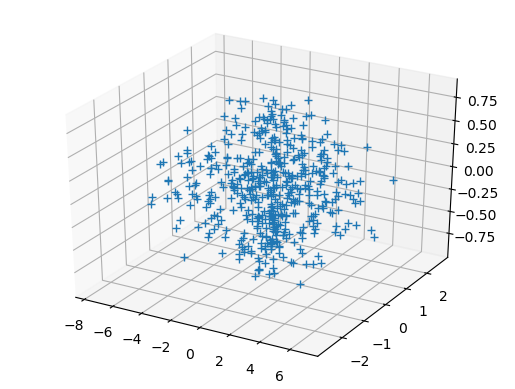

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x0000000037914CC0>

In [5]:
plot3D(X₀[:,1],X₀[:,2],X₀[:,3],"+")

In [6]:
# Compute the means. How good is the RNG?
using Statistics
μ₀=mean(X,dims=1)

1×3 Array{Float64,2}:
 -0.0920898  0.0422521  -0.0313562

In [7]:
# Subtract the means
using LinearAlgebra
X=X.-μ₀
# Rotate by a random orthogonal matrix
Q,r=qr(rand(3,3))
X=X*Q;

In [8]:
# Translate
S=[3,-2,4]

3-element Array{Int64,1}:
  3
 -2
  4

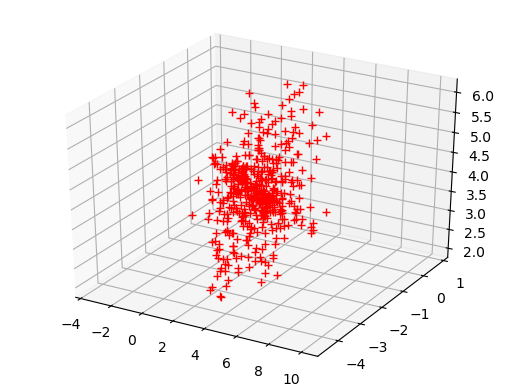

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x000000003845B2E8>

In [9]:
X.+=S'
# plot3D(X0[:,1],X0[:,2],X0[:,3],"b+")
plot3D(X[:,1],X[:,2],X[:,3],"r+" )

In [10]:
C=cov(X)

3×3 Array{Float64,2}:
  5.09879   -1.70037   0.476546
 -1.70037    0.987782  0.131211
  0.476546   0.131211  0.556731

In [11]:
μ=mean(X,dims=1)

1×3 Array{Float64,2}:
 3.0  -2.0  4.0

In [12]:
# Fact 2
display(cov(X.-μ))
(X.-μ)'*(X.-μ)/(m-1)

3×3 Array{Float64,2}:
  5.09879   -1.70037   0.476546
 -1.70037    0.987782  0.131211
  0.476546   0.131211  0.556731

3×3 Array{Float64,2}:
  5.09879   -1.70037   0.476546
 -1.70037    0.987782  0.131211
  0.476546   0.131211  0.556731

In [13]:
# Principal components, evals are non-decreasing
λ,U=eigen(C)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
3-element Array{Float64,1}:
 0.1566981478709535
 0.744117546190463
 5.742492308693457
vectors:
3×3 Array{Float64,2}:
 -0.309961  -0.146337  -0.93942
 -0.730283  -0.596039   0.333804
  0.608779  -0.789508  -0.0778821

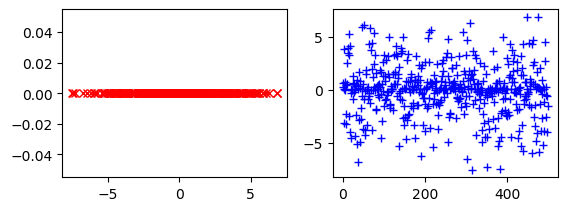

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003FBD8A20>

In [14]:
# Largest principal component
T₁=(X.-μ)*U[:,3]
subplot(221)
plot(T₁,zero(T₁),"rx")
subplot(222)
plot(T₁,"b+")

In [15]:
T₁

500-element Array{Float64,1}:
  0.29996206707659834
  0.6772742362808215
  3.8094370203116115
 -3.1370482339313437
  0.09135344737259722
  0.7013928730378559
  0.04083776783951594
  0.4614700323797337
 -3.1837830826518485
 -2.2115057574112846
  2.5715560709930045
  0.551052213224475
  3.4767140089596293
  ⋮
 -5.153304501328505
 -3.836648538185726
 -1.1709675405307296
  0.04809297736980181
  2.6702481703105008
  4.463874682153369
 -0.4605034068376798
 -2.49409946464779
  0.24407421911052835
 -3.9483774539468586
 -0.5834251816925969
 -1.525890239524489

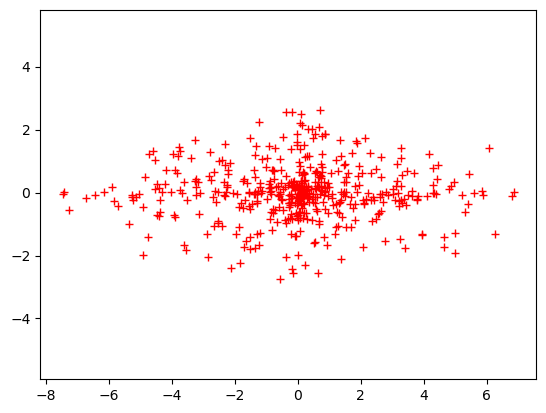

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003FC48780>

In [16]:
# Two largest principal components
T₂=(X.-μ)*U[:,[3,2]]
axis("equal")
plot(T₂[:,1],T₂[:,2],"r+")

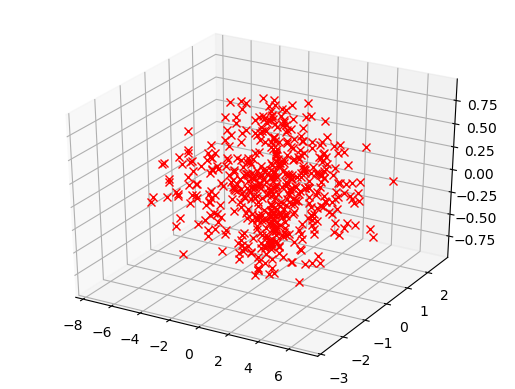

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x000000003FCB1A90>

In [17]:
# All  three principal components
T=(X.-μ)*U[:,[3,2,1]]
plot3D(T[:,1],T[:,2],T[:,3],"rx" )

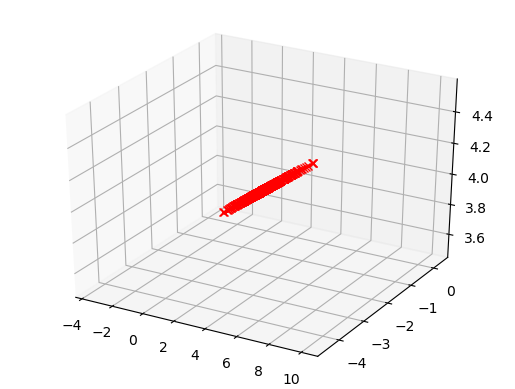

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x000000003FD79630>

In [18]:
# Fact 5 - Recovery of the largest component
Y₁=T₁*U[:,3]'.+μ
plot3D(Y₁[:,1],Y₁[:,2],Y₁[:,3],"rx" )

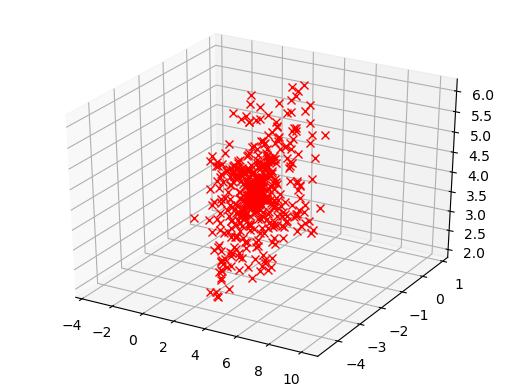

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x000000003FDF6860>

In [19]:
# Recovery of the two largest components
Y₂=T₂*U[:,[3,2]]'.+μ
plot3D(Y₂[:,1],Y₂[:,2],Y₂[:,3],"rx" )

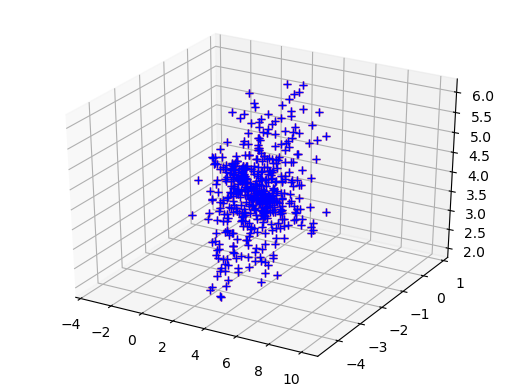

1-element Array{PyCall.PyObject,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x0000000040E1A6D8>

In [20]:
# Recovery of all three components (exact)
Y₃=T*U[:,[3,2,1]]'.+μ
plot3D(Y₃[:,1],Y₃[:,2],Y₃[:,3],"r+" )
plot3D(X[:,1],X[:,2],X[:,3],"b+" )

In [21]:
# Fact 4 - PCA using SVD
function myPCA(X::Array{T}, k::Int) where T
    μ=mean(X,dims=1)
    U=svd(X.-μ)
    U.U[:,1:k]*Diagonal(U.S[1:k])
end

myPCA (generic function with 1 method)

In [22]:
T₁s=myPCA(X,1)
[T₁s T₁]

500×2 Array{Float64,2}:
 -0.299962    0.299962
 -0.677274    0.677274
 -3.80944     3.80944
  3.13705    -3.13705
 -0.0913534   0.0913534
 -0.701393    0.701393
 -0.0408378   0.0408378
 -0.46147     0.46147
  3.18378    -3.18378
  2.21151    -2.21151
 -2.57156     2.57156
 -0.551052    0.551052
 -3.47671     3.47671
  ⋮          
  5.1533     -5.1533
  3.83665    -3.83665
  1.17097    -1.17097
 -0.048093    0.048093
 -2.67025     2.67025
 -4.46387     4.46387
  0.460503   -0.460503
  2.4941     -2.4941
 -0.244074    0.244074
  3.94838    -3.94838
  0.583425   -0.583425
  1.52589    -1.52589

In [23]:
# The two largest components using SVD
T₂s=myPCA(X,2)
[T₂s T₂]

500×4 Array{Float64,2}:
 -0.299962   -0.160003     0.299962   -0.160003
 -0.677274   -0.918847     0.677274   -0.918847
 -3.80944    -0.122284     3.80944    -0.122284
  3.13705    -0.67559     -3.13705    -0.67559
 -0.0913534   0.136863     0.0913534   0.136863
 -0.701393    2.61372      0.701393    2.61372
 -0.0408378  -0.137383     0.0408378  -0.137383
 -0.46147    -0.202334     0.46147    -0.202334
  3.18378     0.323977    -3.18378     0.323977
  2.21151     0.729302    -2.21151     0.729302
 -2.57156    -0.638525     2.57156    -0.638525
 -0.551052   -0.137113     0.551052   -0.137113
 -3.47671     0.695634     3.47671     0.695634
  ⋮                                   
  5.1533     -0.130762    -5.1533     -0.130762
  3.83665     0.614611    -3.83665     0.614611
  1.17097    -0.00285697  -1.17097    -0.00285697
 -0.048093   -0.604167     0.048093   -0.604167
 -2.67025    -0.0541343    2.67025    -0.0541343
 -4.46387     0.868697     4.46387     0.868697
  0.460503    0.103952  

### Example -  Real data 

We will cluster three datasets from [Workshop "Principal Manifolds-2006"](http://www.ihes.fr/~zinovyev/princmanif2006/):

Data set | # of genes (m) | # of samples (n)
:---:|---:|---:
D1 | 17816 | 286
D2 | 3036 | 40
D3 | 10383| 103

In [24]:
# Data set D1
using DelimitedFiles
f=readdlm("files/d1.txt")

17817×287 Array{Any,2}:
 "CHIP"                        "GSM36777"  …    "GSM37061"    "GSM37062"
 "1007_s_at"                  0.12             0            -0.43
 "1053_at"                    0.14             0.46         -0.2
 "117_at"                    -0.14            -0.8          -0.29
 "121_at"                    -0.11             0.21          0.24
 "1255_g_at"                 -0.73         …   0.52          0.72
 "1294_at"                   -0.26            -0.13         -1.06
 "1316_at"                   -0.05            -0.55         -0.05
 "1405_i_at"                 -0.85            -2.92         -0.73
 "1431_at"                   -0.67             0.67          0.58
 "1438_at"                   -0.49         …   0.87         -1.63
 "1487_at"                   -0.47            -0.11          0.32
 "1494_f_at"                  3.97            -0.61         -0.17
 ⋮                                         ⋱   ⋮            
 "AFFX-r2-Ec-bioC-3_at"      -0.59         …   0.03

In [25]:
sizeof(f)

40907832

In [27]:
X=map(Float64,f[2:end,2:end])

17816×286 Array{Float64,2}:
  0.12   0.88   0.58   0.19   0.27  …  -0.2   -0.35  -0.24   0.0   -0.43
  0.14  -0.88  -0.22   0.94   1.01      0.36   0.02  -0.37   0.46  -0.2
 -0.14  -0.31   0.2    0.41   0.48      0.56  -0.05   0.1   -0.8   -0.29
 -0.11   0.94   0.15   0.02  -0.06      0.05  -0.02   0.12   0.21   0.24
 -0.73   1.46  -0.32   1.03   0.39     -0.17  -0.23   1.47   0.52   0.72
 -0.26   0.28  -0.24  -0.21  -0.01  …  -0.18   0.38   0.01  -0.13  -1.06
 -0.05   0.6    0.0    0.04   0.02     -0.41  -0.6    0.0   -0.55  -0.05
 -0.85  -0.31  -2.45   0.69   2.71      0.05   0.75  -0.33  -2.92  -0.73
 -0.67   0.63   0.11   0.19   0.28     -0.83  -0.01  -0.1    0.67   0.58
 -0.49  -0.98  -0.92   2.08   1.26      0.16  -0.23  -0.19   0.87  -1.63
 -0.47   0.08   0.13   0.09   0.67  …   0.0    0.14   0.5   -0.11   0.32
  3.97   0.52   4.93  -0.25   0.16     -0.54  -0.45   0.16  -0.61  -0.17
  0.11   0.37  -0.38  -0.23  -0.72      0.43   0.41  -0.49  -0.28  -0.3
  ⋮                      

In [31]:
sizeof(X)

40763008

In [32]:
# Clear a big variable
f=[]

0-element Array{Any,1}

In [33]:
minimum(μ)

-2.0

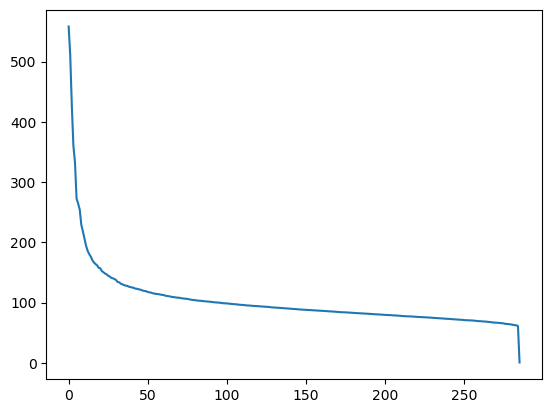

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000000E44E80>

In [34]:
# Fact 7 - Plot σ's and observe the knee
μ=mean(X,dims=1)
σ=svdvals(X.-μ)
plot(σ)

In [35]:
# PCA on X, keep 20 singular values
k=20
T=myPCA(X,k)

17816×20 Array{Float64,2}:
 -2.60997     1.29427    3.82777   …   0.416223   -0.908852    -0.339937
  2.53162     6.72032    1.25924       0.950754   -0.53449      0.0961831
  2.63868     2.01813    2.13187       1.72483     0.513846    -0.0914956
 -0.631409   -0.94409    1.88523       0.440639   -0.745012     0.0996248
 -0.8162      0.174124   3.59941       1.30466    -2.34368      0.369603
 -0.274186   -1.29081   -1.33486   …  -0.473495   -0.62421     -1.26462
  0.401881   -0.738539   1.34847       0.39025    -0.00439161   0.0151878
 21.7269     -4.06805   -9.91123      -2.0272     -1.41633     -0.0263997
 -2.58371    -0.156413  -0.737911     -0.265203    1.58469      0.322162
  4.17899    17.0184     1.83096       2.91487    -0.433558     1.164
  0.772371    0.155414   1.66253   …  -0.833175    0.397829    -0.700775
 -5.42643    -0.788577   1.64396      -1.44325     0.387156     0.840406
  0.500175   -4.16445   -3.51728       0.221502    0.00109187  -1.79048
  ⋮                     

In [36]:
# Find k clusters
using Clustering
out=kmeans(T',k)

KmeansResult{Array{Float64,2},Float64,Int64}([0.4479409055642475 16.61992804801323 … 1.0191442037116845 -6.606278102066237; -0.4999230131456247 -2.85608183493833 … -2.833996767380364 -0.7568406830610415; … ; -0.08722636069764543 -0.07775108793249724 … -0.13481243048022915 0.24634479857645455; -0.22181350048270218 0.9789521320592013 … 0.008726781802413036 0.11106128818988918], [9, 16, 1, 11, 11, 1, 11, 18, 11, 10  …  1, 1, 19, 16, 1, 16, 19, 19, 1, 1], [23.275824213633328, 33.943241830921124, 27.385370171841767, 14.237005423581778, 27.292306232274605, 36.480487171461036, 11.80839511944258, 187.72807385988074, 21.407701820613898, 144.60126436100262  …  30.432322977593657, 47.16512526991336, 106.33136039871516, 176.6463363445066, 142.62919095781675, 110.58607744367379, 67.46692090977047, 66.23388134318178, 39.38057352617638, 34.56320548815402], [1763, 68, 367, 863, 395, 416, 1009, 845, 2044, 403, 2304, 1995, 333, 187, 63, 809, 705, 226, 2075, 946], [1763, 68, 367, 863, 395, 416, 1010, 845

In [37]:
# Plot points defined by the first three principal components
function myPlot(C::Vector, T::Array, k::Int)
    P=Array{Any}(undef,k)
    for j=1:k
        P[j]=T[C.==j,1:3]
        plot3D(P[j][:,1],P[j][:,2],P[j][:,3],"x")
    end
end

myPlot (generic function with 1 method)

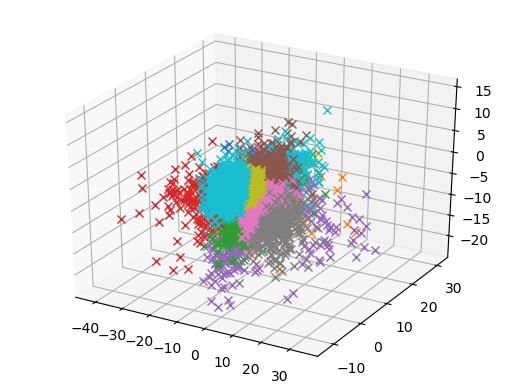

In [38]:
myPlot(out.assignments,T,k)

In [39]:
# Data set D2
X=readdlm("files/d2fn.txt")

3036×40 Array{Float64,2}:
  0.0681   0.072    0.3944  -0.0606  …  -0.3723  -0.2963  -0.619   -0.4171
  0.1402   0.2517   0.0843   0.1794     -0.1204   0.0086  -0.8177  -0.3646
  0.0081   0.3179   0.5802   0.0162     -0.2968  -0.3981  -1.055   -0.4583
  0.1049   0.3031   0.3048   0.2214     -0.288   -0.0841  -0.7231  -0.2951
  0.0609   0.4262   0.104    0.227      -0.3255  -0.1652  -0.6634  -0.4358
 -0.1163   0.2005  -0.2816   0.1192  …  -0.2508  -0.034   -0.5112  -0.1964
  0.1276   0.4596   0.3751   0.2379     -0.4025  -0.3775  -0.6091  -0.4265
  0.1362   0.4215   0.0645   0.3017     -0.3727  -0.3352  -0.642   -0.4601
  0.1455   0.3676   0.1463   0.2997     -0.4893  -0.5417  -0.6408  -0.5108
 -0.7093   0.6045  -0.6372  -0.6594     -0.1644  -0.0441   0.4404   0.4663
 -0.0044   0.1012   0.1362   0.432   …  -0.1594   0.4027  -0.5591  -0.1365
  0.1288   0.6568   0.7199   0.2173     -0.2006   0.0184  -1.1106   0.1015
  0.5014   0.6976   0.9516   0.6017     -1.168   -2.0287  -1.0887  -0.5792

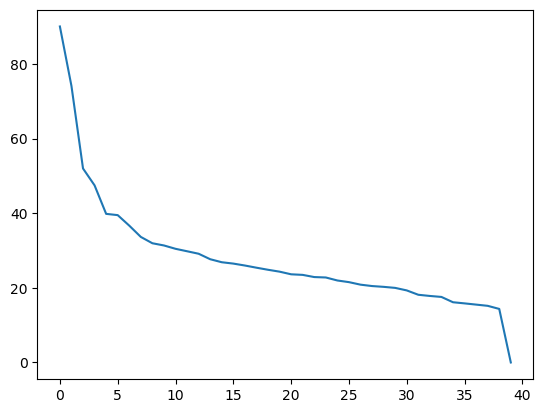

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000000F296A0>

In [40]:
μ=mean(X,dims=1)
σ=svdvals(X.-μ)
plot(σ)

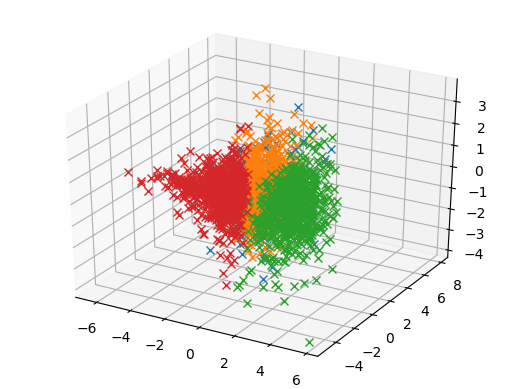

In [41]:
k=4
T=myPCA(X,k)
out=kmeans(T',k)
myPlot(out.assignments,T,k)

We use the package [CSV.jl](https://github.com/JuliaData/CSV.jl) and replace the "NULL" string with `missing`.

In [42]:
using CSV

In [43]:
sf = CSV.read("files/d3efn.txt", header=0,missingstring="NULL")

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,0.179,-0.201,1.289,0.039,0.869,1.139,-0.421,-0.251
2,1.042,0.162,0.612,0.472,0.382,1.392,0.282,0.612
3,-0.022,-0.482,missing,-0.182,missing,0.988,-0.202,-0.572
4,-0.597,0.183,0.593,-0.467,0.273,missing,0.283,-0.387
5,0.699,0.639,0.739,0.349,missing,-0.081,0.229,-0.281
6,1.035,-3.015,-2.255,-2.725,-2.095,0.645,-0.295,-0.875
7,0.64,-4.9,-4.24,-4.34,-3.39,0.54,-2.6,-2.49
8,0.904,-2.636,-2.446,-1.996,missing,1.094,-1.236,-1.096
9,0.74,-2.15,missing,-3.43,missing,0.3,-1.73,-1.57


In [44]:
# sf[:,103]

In [45]:
typeof(sf)

DataFrames.DataFrame

In [46]:
# Set missing values to zero
X=coalesce.(Matrix(sf[:,1:end-1]),0.0)

10387×102 Array{Float64,2}:
  0.179  -0.201   1.289   0.039   0.869  …  -0.961  -0.821  -0.551   1.279
  1.042   0.162   0.612   0.472   0.382     -0.788  -0.598  -0.078   0.0
 -0.022  -0.482   0.0    -0.182   0.0        0.688   0.758  -0.002   0.108
 -0.597   0.183   0.593  -0.467   0.273      0.253  -0.187  -0.707   0.393
  0.699   0.639   0.739   0.349   0.0       -0.711  -3.391   0.769   1.519
  1.035  -3.015  -2.255  -2.725  -2.095  …  -1.235  -3.185  -0.895   1.845
  0.64   -4.9    -4.24   -4.34   -3.39      -1.04   -1.72   -1.41    2.62
  0.904  -2.636  -2.446  -1.996   0.0       -0.986  -0.986  -0.976   1.114
  0.74   -2.15    0.0    -3.43    0.0       -1.17   -0.95   -1.78    1.87
  0.771   0.0    -1.389  -1.249   0.0       -1.829   0.0    -1.049   0.391
  0.351  -0.829  -1.239  -0.679  -1.089  …  -1.139  -0.279  -0.789   0.441
  0.926  -1.034   0.0    -0.654   0.0        0.726   0.166  -0.104   0.0
 -0.216  -0.126   0.484   0.024   0.134     -1.206   0.074  -0.226   1.434
  ⋮

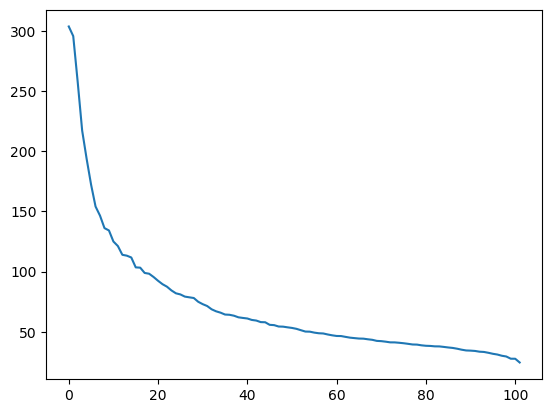

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000000FC1940>

In [47]:
μ=mean(X,dims=1)
σ=svdvals(X.-μ)
plot(σ)

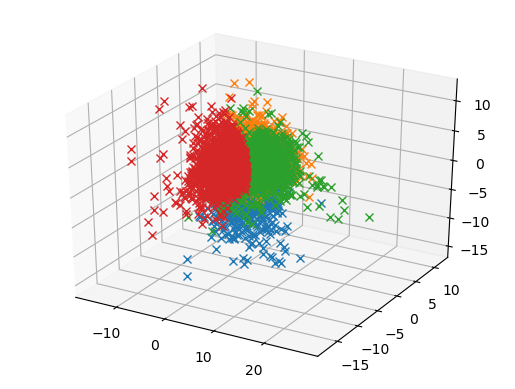

In [48]:
k=4
T=myPCA(X,k)
out=kmeans(T',k)
myPlot(out.assignments,T,k)

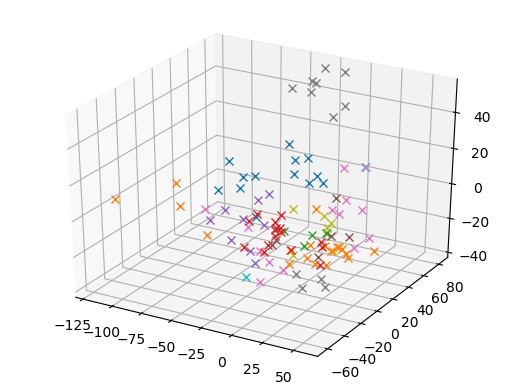

In [49]:
# Clustering the transpose
k=20
T=myPCA(Matrix(X'),k)
out=kmeans(T',k)
myPlot(out.assignments,T,k)